In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


np.set_printoptions(precision=3) 

C:\Users\Annali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Feature Selection

In the lecture, you learned about three types of feature selection. In the following, consider the F measure for a filter, Sequential Feature Selector as a wrapper, and Lasso as an embedded method.

Apply each of them to the real-world dataset from Project2 to select the two and the six most important features. Use one regressor of your choice as a baseline and the evaluation methods from the last project (including learning curves).

Utilize the R2 score when reporting and analyzing your results. Also, take a look at which features are selected and which are not by the different techniques.


In [3]:
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
# From project 2
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")

    return plt

In [5]:
# Function to evaluate the performance and print selected features
def evaluate_features(X_selected, regressor, name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

    # Train the regressor
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Evaluate performance using R2 score
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R2-score: {r2}")

    # Plot learning curve
    plot_learning_curve(regressor, f'Learning Curves ({name})', X_selected, y)

In [6]:
# Load the data
data = np.load('real_world.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X = data['X']
y = data['y']
features = data['features']

print(features)

# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())


# Basic statistical description
print("Mean of X: ", np.mean(X))
print("Standard deviation of X: ", np.std(X))
print("Min of X: ", np.min(X))
print("Max of X: ", np.max(X))

Label: X, Shape: (1095, 10)
Label: y, Shape: (1095,)
Label: features, Shape: (10,)
['LotArea' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'WoodDeckSF'
 'OpenPorchSF' '3SsnPorch' 'ScreenPorch' 'PoolArea']
NaN values in X:  0
NaN values in y:  0
Mean of X:  1494.0469406392695
Standard deviation of X:  4695.643630440661
Min of X:  0
Max of X:  215245


Filter Method (2 features) R2-score: 0.22447014540186339
Filter Method (2 features) Selected Features:
['TotalBsmtSF' 'GrLivArea']
Filter Method (6 features) R2-score: 0.4681446123479457
Filter Method (6 features) Selected Features:
['2ndFlrSF' 'OpenPorchSF' 'WoodDeckSF' '1stFlrSF' 'TotalBsmtSF'
 'GrLivArea']
Wrapper Method (2 features) forward R2-score: 0.22447014540186339
Wrapper Method (2 features) Forward Selected Features:
['TotalBsmtSF' 'GrLivArea']
Wrapper Method (2 features) backward R2-score: 0.20220198144807544
Wrapper Method (2 features) Backward Selected Features:
['TotalBsmtSF' '2ndFlrSF']
Wrapper Method (6 features) forward R2-score: 0.46214679668440983
Wrapper Method (6 features) Forward Selected Features:
['LotArea' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'GrLivArea' 'OpenPorchSF']
Wrapper Method (6 features) backward R2-score: 0.43744746420560077
Wrapper Method (6 features) Backward Selected Features:
['LotArea' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'OpenPorchSF' '3SsnPorch'

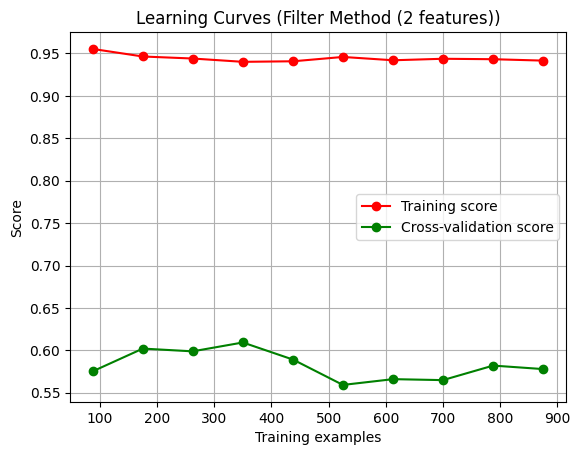

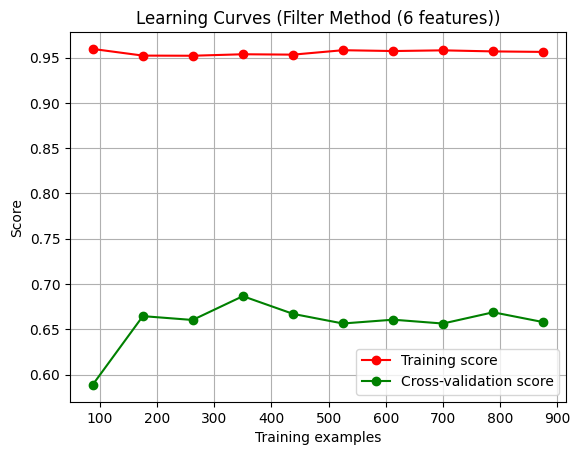

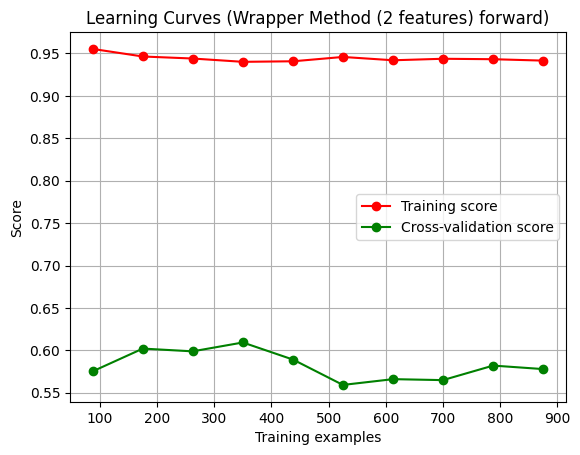

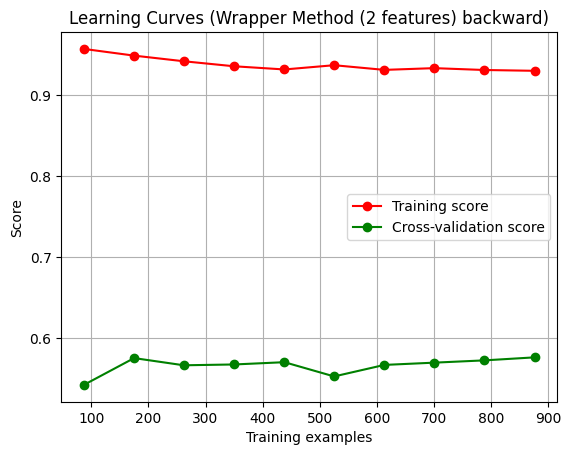

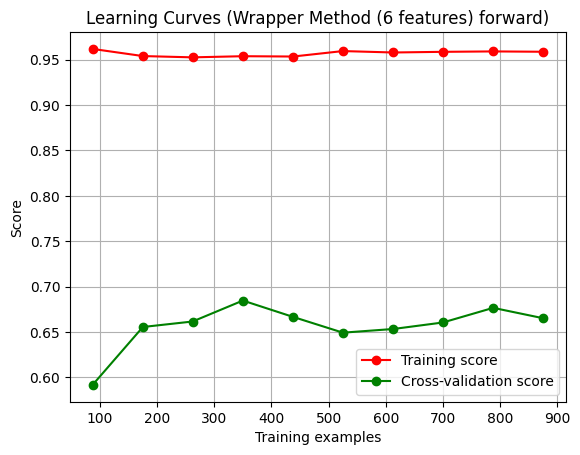

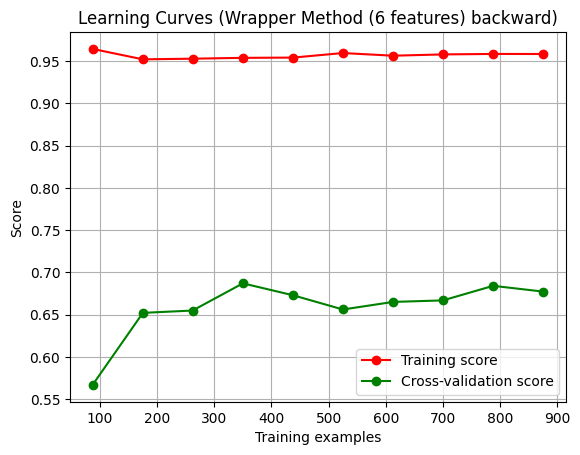

In [7]:
# Baseline regressor (Random Forest)
baseline_regressor = RandomForestRegressor(random_state=0)

# Filter method using F measure
f_values, _ = f_regression(X, y)
selected_features_filter = X[:, np.argsort(f_values)[-2:]]  # Select 2 most important features
evaluate_features(selected_features_filter, baseline_regressor, 'Filter Method (2 features)')
print("Filter Method (2 features) Selected Features:")
print(features[np.argsort(f_values)[-2:]])

f_values, _ = f_regression(X, y)
selected_features_filter = X[:, np.argsort(f_values)[-6:]]  # Select 6 most important features
evaluate_features(selected_features_filter, baseline_regressor, 'Filter Method (6 features)')
print("Filter Method (6 features) Selected Features:")
print(features[np.argsort(f_values)[-6:]])



# Wrapper method using Sequential Feature Selector
sfs = SequentialFeatureSelector(baseline_regressor, n_features_to_select=2, direction='forward', cv=5)
selected_features_wrapper = sfs.fit_transform(X, y)
evaluate_features(selected_features_wrapper, baseline_regressor, 'Wrapper Method (2 features) forward')
print("Wrapper Method (2 features) Forward Selected Features:")
print(features[np.where(sfs.get_support())[0]])

sfs = SequentialFeatureSelector(baseline_regressor, n_features_to_select=2, direction='backward', cv=5)
selected_features_wrapper = sfs.fit_transform(X, y)
evaluate_features(selected_features_wrapper, baseline_regressor, 'Wrapper Method (2 features) backward')
print("Wrapper Method (2 features) Backward Selected Features:")
print(features[np.where(sfs.get_support())[0]])


# Wrapper method using Sequential Feature Selector
sfs = SequentialFeatureSelector(baseline_regressor, n_features_to_select=6, direction='forward', cv=5)
selected_features_wrapper = sfs.fit_transform(X, y)
evaluate_features(selected_features_wrapper, baseline_regressor, 'Wrapper Method (6 features) forward')
print("Wrapper Method (6 features) Forward Selected Features:")
print(features[np.where(sfs.get_support())[0]])


sfs = SequentialFeatureSelector(baseline_regressor, n_features_to_select=6, direction='backward', cv=5)
selected_features_wrapper = sfs.fit_transform(X, y)
evaluate_features(selected_features_wrapper, baseline_regressor, 'Wrapper Method (6 features) backward')
print("Wrapper Method (6 features) Backward Selected Features:")
print(features[np.where(sfs.get_support())[0]])

Embedded Method (Lasso, 2 features) R2-score: 0.1829273121163003
Selected Features for Lasso (2 features): ['2ndFlrSF' '1stFlrSF']
Embedded Method (Lasso, 6 features) R2-score: 0.44181473058399556
Selected Features for Lasso (6 features): ['2ndFlrSF' '1stFlrSF' 'TotalBsmtSF' 'WoodDeckSF' 'OpenPorchSF'
 'ScreenPorch']


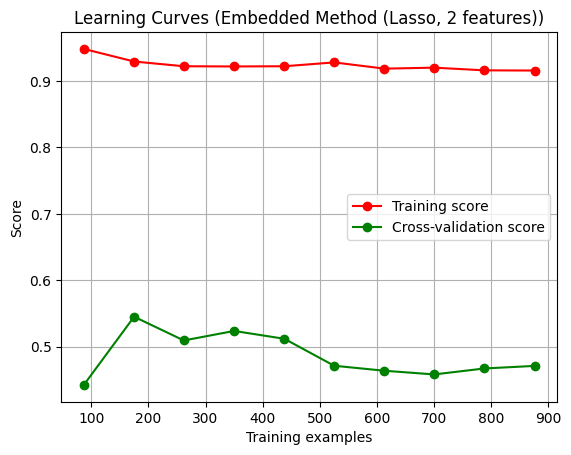

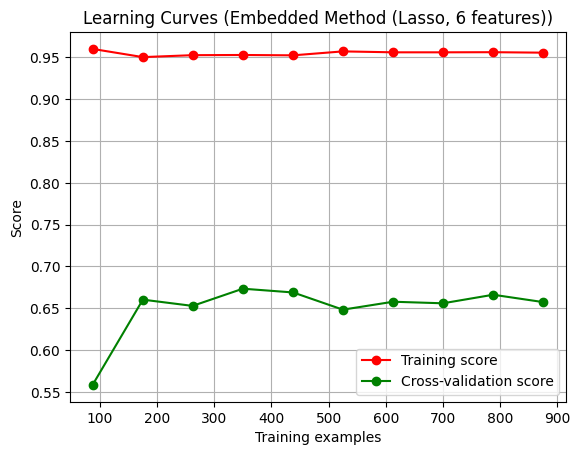

In [8]:
# Function to perform Lasso with a specified number of features
def lasso_feature_selection(X, y, num_features, alpha=0.1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)

    # Get the indices of the 'num_features' most important features
    selected_feature_indices = np.argsort(np.abs(lasso.coef_))[::-1][:num_features]

    # Select the corresponding features
    selected_features_lasso = X[:, selected_feature_indices]
    
    return selected_features_lasso, selected_feature_indices

num_features_2 = 2
num_features_6 = 6

# Perform Lasso with 2 features
selected_features_lasso_2, indices_lasso_2 = lasso_feature_selection(X, y, num_features_2)
evaluate_features(selected_features_lasso_2, baseline_regressor, f'Embedded Method (Lasso, {num_features_2} features)')
print(f"Selected Features for Lasso (2 features): {features[indices_lasso_2]}")

# Perform Lasso with 6 features
selected_features_lasso_6, indices_lasso_6 = lasso_feature_selection(X, y, num_features_6)
evaluate_features(selected_features_lasso_6, baseline_regressor, f'Embedded Method (Lasso, {num_features_6} features)')
print(f"Selected Features for Lasso (6 features): {features[indices_lasso_6]}")


In [9]:
assert(False)

AssertionError: 

# 2. Random Forest and Feature Importances

(a) Train and evaluate with cross-validation a random forest classifier, and the other classifiers you know from the lecture on `dataset1.npz` (Naive Bayes, Logistic Regression, kNN).

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import os

In [ ]:
# Load the dataset
data = np.load('dataset1.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X = data['X']
y = data['y']

# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())

# Basic statistical description
print("Mean of X: ", np.mean(X))
print("Standard deviation of X: ", np.std(X))
print("Min of X: ", np.min(X))
print("Max of X: ", np.max(X))
print("Mean of y: ", np.mean(y))
print("Standard deviation of y: ", np.std(y))
print("Min of y: ", np.min(y))
print("Max of y: ", np.max(y))


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Label: X, Shape: (1000, 10)
Label: y, Shape: (1000,)
NaN values in X:  0
NaN values in y:  0
Mean of X:  0.009103199689254387
Standard deviation of X:  4.889552185504463
Min of X:  -9.987331057574282
Max of X:  9.984246448480757
Mean of y:  0.5
Standard deviation of y:  0.5
Min of y:  0.0
Max of y:  1.0


In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Classifier Cross-Validation Accuracy: {np.mean(rf_scores)}")

# Naive Bayes Classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()
nb_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Naive Bayes Classifier Cross-Validation Accuracy: {np.mean(nb_scores)}")

# Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=0)
lr_scores = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Classifier Cross-Validation Accuracy: {np.mean(lr_scores)}")

# k-Nearest Neighbors Classifier (kNN)
knn_classifier = KNeighborsClassifier()
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
print(f"k-Nearest Neighbors Classifier Cross-Validation Accuracy: {np.mean(knn_scores)}")

(b) Visualize the data by plotting each combination of two features. Analyze the feature importances of the random forest with respect to the data. Rerun your experiments on a suitable subset of the features.

In [ ]:
# Function to plot each combination of two features and save individual plots
def plot_feature_combinations(X, y, save_folder):
    n_features = X.shape[1]

    for i in range(n_features):
        for j in range(n_features):
            if i != j:
                fig, ax = plt.subplots(figsize=(8, 8))
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired, edgecolors='k', s=20)
                ax.set_xticks(())
                ax.set_yticks(())
                ax.set_xlabel(f'Feature {i}')
                ax.set_ylabel(f'Feature {j}')
                plt.title(f'Feature Combination {i} vs {j}')

                # Save the individual plot to the specified folder
                save_path = os.path.join(save_folder, f'feature_combination_{i}_vs_{j}.png')
                plt.savefig(save_path)
                plt.close()

In [ ]:
output_folder = 'feature_plots'
os.makedirs(output_folder, exist_ok=True)

# Visualize data by plotting each combination of two features and save individual plots
plot_feature_combinations(X, y, save_folder=output_folder)
## Put plots in appendix and refer to them in the report


## See make_classification and how to plot importances on scikit learn
# Train Random Forest and analyze feature importances
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X, y)

# Plot feature importances
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = [f'Feature {i}' for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), features, rotation=45)
plt.title("Random Forest Feature Importances")
plt.show()

# Rerun experiments on a suitable subset of features (e.g., top k features)
k = 5  # Adjust the value of k based on the feature importance analysis
X_subset = X[:, sorted_idx[:k]]

# Rerun experiments with the subset of features
rf_classifier_subset = RandomForestClassifier(random_state=0)
rf_scores_subset = cross_val_score(rf_classifier_subset, X_subset, y, cv=5, scoring='accuracy')
print(f"Random Forest Classifier (Subset) Cross-Validation Accuracy: {np.mean(rf_scores_subset)}")


# 3. Challenge

This exercise constitutes a challenge: Apply the learned concepts of the lecture and potentially think of new solutions in order to achieve an F1 score (use class 1 as 'positive' class) of at least 0.95 for the test set of `dataset2.npz`, without using it for training.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [10]:
# Load dataset
data = np.load('dataset2.npz')

# Get the labels
keys = list(data.keys())

labels_and_shapes = {key: data[key].shape for key in keys}

for label, shape in labels_and_shapes.items():
    print(f"Label: {label}, Shape: {shape}")

X_train = data['X_train']
y_train = data['Y_train']
X_test = data['X_test']
y_test = data['Y_test']


# Check for NaN
print("NaN values in X: ", np.isnan(X).sum())
print("NaN values in y: ", np.isnan(y).sum())

# Basic statistical description
print("Mean of X: ", np.mean(X))
print("Standard deviation of X: ", np.std(X))
print("Min of X: ", np.min(X))
print("Max of X: ", np.max(X))
print("Mean of y: ", np.mean(y))
print("Standard deviation of y: ", np.std(y))
print("Min of y: ", np.min(y))
print("Max of y: ", np.max(y))


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Label: X_train, Shape: (50, 13)
Label: Y_train, Shape: (50,)
Label: X_test, Shape: (60, 13)
Label: Y_test, Shape: (60,)


KeyError: 'X is not a file in the archive'

In [ ]:
# Address class imbalance using oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    # Add other relevant parameters
}

# Create the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

In [ ]:
# Create the RandomForestClassifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42)

# Train the classifier on your training data
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Train kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Report classification metrics
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# 4. Bonus Task - Clustering

Load the three given pictures and compress them by clustering the pixels of each picture according to their color values. Then, represent each pixel of a cluster in the mean color of the cluster. Visualize your results for different reasonable numbers of clusters using at least one evaluation score.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage import io
from skimage.util import img_as_float

In [ ]:
# Function to perform k-means clustering on an image
def cluster_image(image, n_clusters):
    # Reshape the image to a 2D array of pixels
    pixels = img_as_float(image).reshape((-1, 3))

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_

    # Assign new colors to pixels based on cluster centers
    compressed_image = centers[labels].reshape(image.shape)

    return compressed_image, kmeans  # Return kmeans object for later use

# Function to visualize the compressed image
def visualize_compressed_image(original_image, compressed_image, n_clusters):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(original_image)
    ax[0].set_title('Original Image')

    ax[1].imshow(compressed_image)
    ax[1].set_title(f'Compressed Image ({n_clusters} clusters)')

    plt.show()

# Load the images
image_paths = ['img/CITEC.png', 'img/UBI_X.png', 'img/UHG.png']
images = [io.imread(path) for path in image_paths]

# Choose the number of clusters for each image
n_clusters_list = [[2, 4, 8], [3, 5, 7], [4, 6, 9]]

for image, n_clusters_for_image in zip(images, n_clusters_list):
    for n_clusters in n_clusters_for_image:
        compressed_image, kmeans = cluster_image(image, n_clusters)
        visualize_compressed_image(image, compressed_image, n_clusters)

        # Calculate silhouette score for evaluation
        silhouette_avg = silhouette_score(img_as_float(image).reshape((-1, 3)), kmeans.labels_)
        print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")